# 0.) Import and Clean data

In [2]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [23]:
df.shape

(167, 10)

In [15]:
# Extracting features for clustering
X = df.drop('country', axis=1)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 1.) Fit a kmeans Model with any Number of Clusters

In [42]:
# Fit KMeans model with a specified number of clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_scaled)

# Predict the cluster for each data point
y_kmeans = kmeans.predict(X_scaled)

/Users/weijiayu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 2.) Pick two features to visualize across

In [18]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

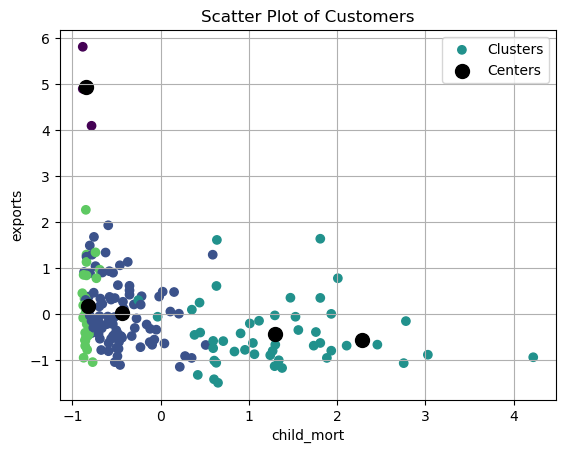

In [43]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


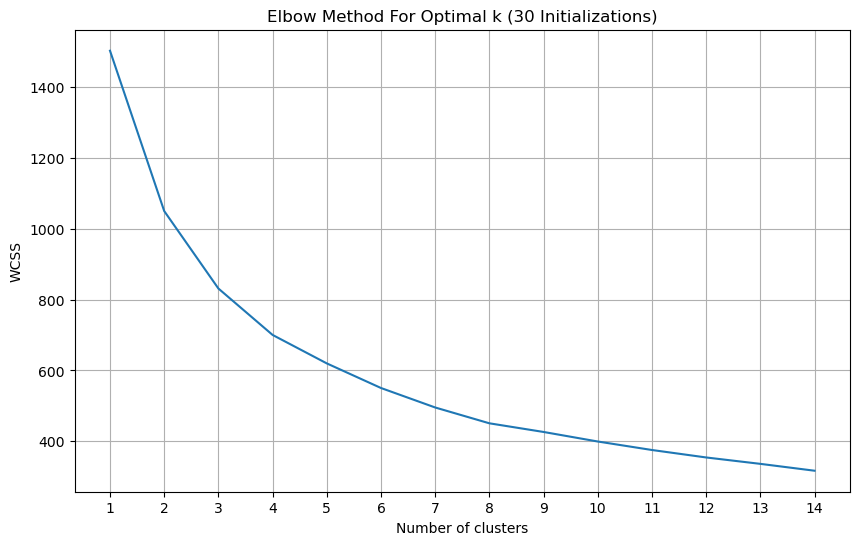

In [46]:
# Calculating WCSS for different numbers of clusters with 30 different centroid initializations
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=30, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results on a line graph to observe the 'Elbow' with 30 centroid initializations
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method For Optimal k (30 Initializations)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

In [ ]:
#bonus
WCSSs=[KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=30, random_state=0).fit(features_scaled),for i in range(1, 15)]

In [45]:
#WCSS 如果不下降，很可能是不能收敛

It seems that elbow is at 2,3 and 4.

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [29]:
# Fit KMeans model with a specified number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_scaled)

# Predict the cluster for each data point
y_kmeans = kmeans.predict(X_scaled)

/Users/weijiayu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


I choose 4 clusters since the elbow is at 2,3,4 and we can verify 4 clusters by economic sense.

High-income economies: Characterized by high GDP per capita, low child mortality, high life expectancy, and low fertility rates.

Upper-middle-income economies: Countries transitioning from developing to developed status, showing improvements in health care and economic indicators.

Lower-middle-income economies: Countries with some development indicators improving, but still facing challenges in health, education, and income.

Low-income economies: Countries struggling with high child mortality, low income per capita, poor health care, and high fertility rates.

# 6.) Do the same for a silhoutte plot

In [30]:
from sklearn.metrics import silhouette_score

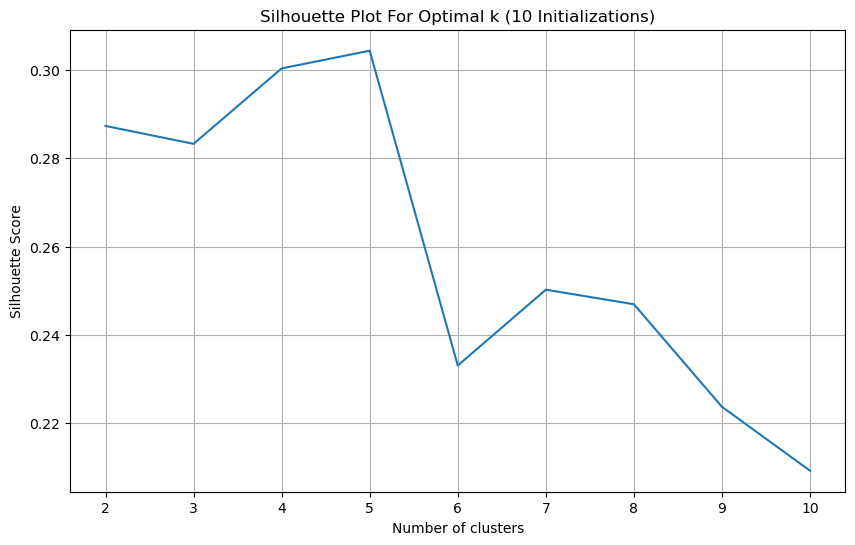

In [33]:
silhouette_scores = []

# We need to use features_scaled instead of X_scaled based on previous context and correct the range to start from 2
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    
    # Calculate silhouette score and append to the list
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Plot For Optimal k (10 Initializations)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

According to silhoutte score, 5 clusters may be the best.

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [35]:
optimal_clusters = 4
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(X_scaled)

# Assigning the cluster labels to the original data
df['Cluster'] = kmeans_optimal.labels_

# Creating a list of countries in each cluster
clustered_countries = {}
for cluster in range(optimal_clusters):
    clustered_countries[f"Cluster {cluster}"] = df[df['Cluster'] == cluster]['country'].values.tolist()

clustered_countries

{'Cluster 0': ['Australia',
  'Austria',
  'Belgium',
  'Brunei',
  'Canada',
  'Cyprus',
  'Denmark',
  'Finland',
  'France',
  'Germany',
  'Greece',
  'Iceland',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Kuwait',
  'Netherlands',
  'New Zealand',
  'Norway',
  'Portugal',
  'Qatar',
  'Slovenia',
  'South Korea',
  'Spain',
  'Sweden',
  'Switzerland',
  'United Arab Emirates',
  'United Kingdom',
  'United States'],
 'Cluster 1': ['Afghanistan',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Congo, Dem. Rep.',
  'Congo, Rep.',
  "Cote d'Ivoire",
  'Equatorial Guinea',
  'Eritrea',
  'Gabon',
  'Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'Haiti',
  'Iraq',
  'Kenya',
  'Kiribati',
  'Lao',
  'Lesotho',
  'Liberia',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mozambique',
  'Myanmar',
  'Namibia',
  'Niger',
  'Nigeria',
  'Pakistan',
  'Rwanda',
  'Senegal',
  '

Interesting Observations

Economic Diversity Within Clusters: Cluster 0 shows a broad mix, indicating varying paths of development within a wide economic spectrum.

Development and Wealth: Clusters 2 and 3 distinctly separate the wealthier, more developed nations from the rest, illustrating global economic inequalities.

Challenges and Needs: Cluster 1's countries highlight regions where international aid and development efforts could be most needed, focusing on health, education, and economic development.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [40]:
df=df.drop('country', axis=1)

In [41]:
cluster_descriptive_stats = df.groupby('Cluster').mean()

cluster_descriptive_stats

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
1,92.366667,28.546229,6.296458,41.443040,3937.770833,11.915938,59.345833,4.953958,1902.916667
2,20.889535,41.769535,6.285465,48.596512,13076.162791,7.417802,73.006977,2.285116,6988.069767
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


# 9.) Write an observation about the descriptive statistics.

Cluster 0 represents countries with moderate income levels, moderate child mortality, and a balanced approach to imports and exports. Their GDP per capita and life expectancy are above the global average but not at the level of the most developed countries. This cluster might represent transitioning or emerging economies.

Cluster 1 includes countries with the highest child mortality rates, the lowest income, and the lowest GDP per capita, reflecting significant development challenges. Life expectancy is substantially lower, and inflation rates are higher, indicating economic instability and healthcare issues.

Cluster 2 is characterized by high-income countries with very low child mortality, high life expectancy, and substantial investments in health as a percentage of GDP. Their GDP per capita is very high, indicating strong economies and high standards of living.

Cluster 3 stands out with exceptionally high exports and imports as a percentage of GDP, the highest income, and the highest GDP per capita among all clusters. This cluster has the lowest child mortality rates and the highest life expectancy, indicating extremely high levels of wealth and development, likely due to significant financial or technological advancement.